In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df_comp = pd.read_csv('/Users/abhishektiwari/Desktop/sem2/CS506/code/tmph4izx_fb.csv')
df_comp.head()

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source
0,101004125189,2022-01-13 12:59:00,2022-01-20 12:59:39,NaN,OVERDUE,Open,,Illegal Rooming House,Inspectional Services,Building,...,C11,Dorchester,8,Ward 17,1706,27 Lithgow St,2124.0,42.2896,-71.0701,Constituent Call
1,101004161747,2022-02-02 11:42:49,2022-02-16 11:42:49,2022-02-02 11:45:47,ONTIME,Closed,Case Closed Case Noted,PublicWorks: Complaint,Mayor's 24 Hour Hotline,Employee & General Comments,...,,,,,,NaN,NaN,42.3594,-71.0587,Constituent Call
2,101004149944,2022-01-28 19:36:00,NaN,NaN,ONTIME,Open,,Space Savers,Public Works Department,Sanitation,...,B3,Greater Mattapan,9,Ward 14,1411,492 Harvard St,2124.0,42.2876,-71.0936,Constituent Call
3,101004113302,2022-01-01 00:36:24,2022-01-04 08:30:00,2022-01-03 00:13:17,ONTIME,Closed,Case Closed. Closed date : 2022-01-03 00:13:17...,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,...,C6,South Boston / South Boston Waterfront,5,6,0601,INTERSECTION Seaport Blvd & Sleeper St,NaN,42.3594,-71.0587,Citizens Connect App
4,101004122704,2022-01-11 09:47:00,2022-02-10 09:47:22,NaN,OVERDUE,Open,,DISPATCHED Heat - Excessive Insufficient,Inspectional Services,Housing,...,B2,Roxbury,13,Ward 12,1202,15 Crawford St,2121.0,42.3110,-71.0841,Constituent Call


In [7]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276723 entries, 0 to 276722
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   case_enquiry_id                 276723 non-null  int64  
 1   open_dt                         276723 non-null  object 
 2   target_dt                       242593 non-null  object 
 3   closed_dt                       247501 non-null  object 
 4   ontime                          276723 non-null  object 
 5   case_status                     276723 non-null  object 
 6   closure_reason                  276723 non-null  object 
 7   case_title                      276719 non-null  object 
 8   subject                         276723 non-null  object 
 9   reason                          276723 non-null  object 
 10  type                            276723 non-null  object 
 11  queue                           276723 non-null  object 
 12  department      

<AxesSubplot: >

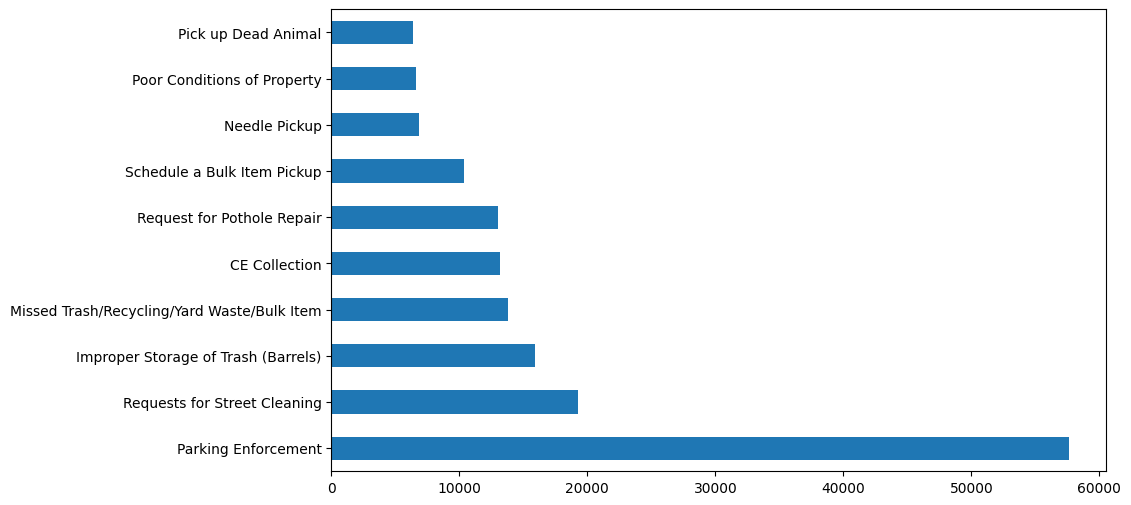

In [8]:
#plot the top-10 complaints by type
df_comp['type'].value_counts().head(10).plot(kind='barh', figsize=(10,6))

#Most of the complaints are for parking enforcement and street cleaning

<AxesSubplot: >

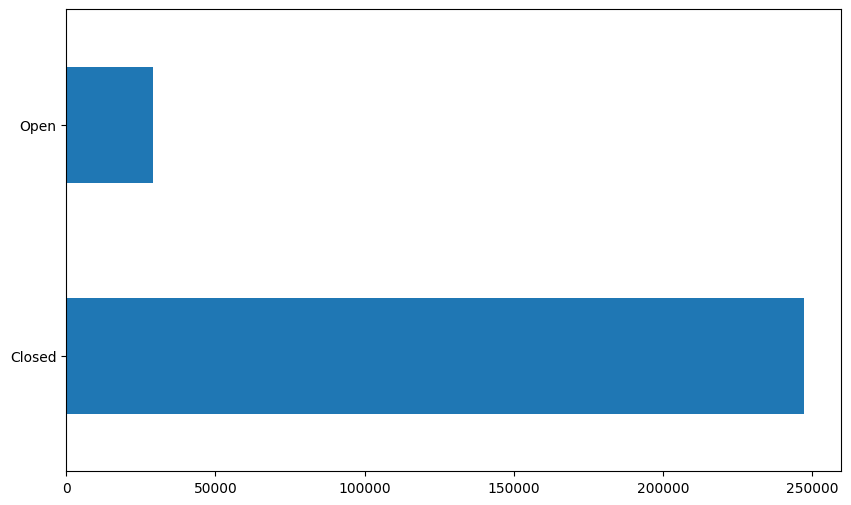

In [9]:
df_comp['case_status'].value_counts().head(10).plot(kind='barh', figsize=(10,6))

<AxesSubplot: ylabel='type'>

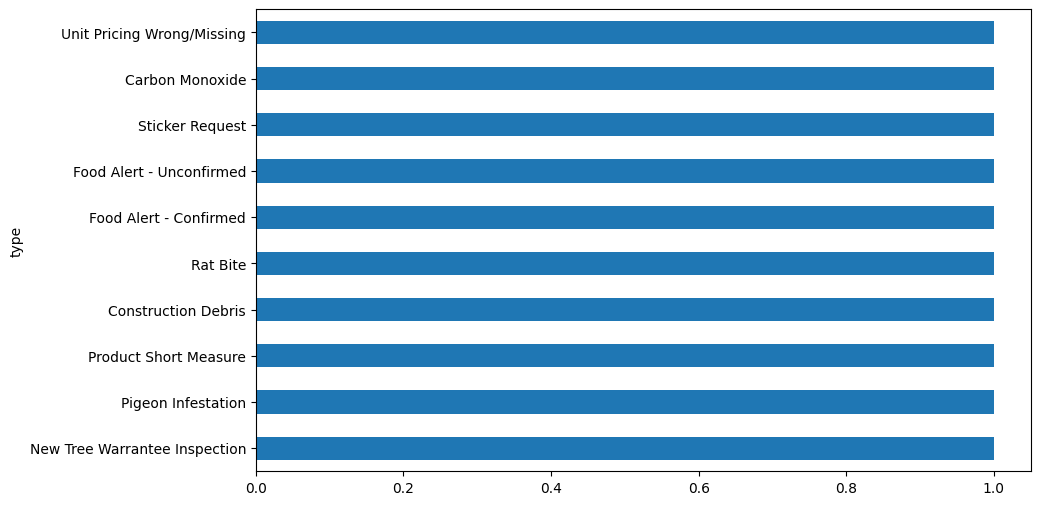

In [10]:
#Categories with most closed complaints
df_comp.groupby('type')['case_status'].value_counts(normalize=True).loc[:,'Closed'].sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10,6))

<AxesSubplot: ylabel='type'>

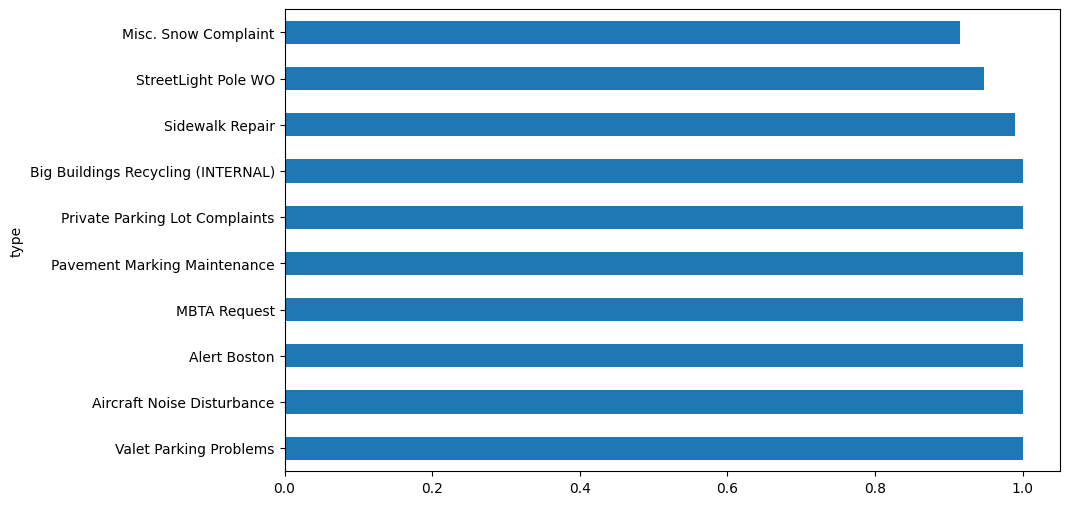

In [11]:
#Categories with most open complaints
df_comp.groupby('type')['case_status'].value_counts(normalize=True).loc[:,'Open'].sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10,6))


Serious hazarads are closed 100% of the times

<AxesSubplot: >

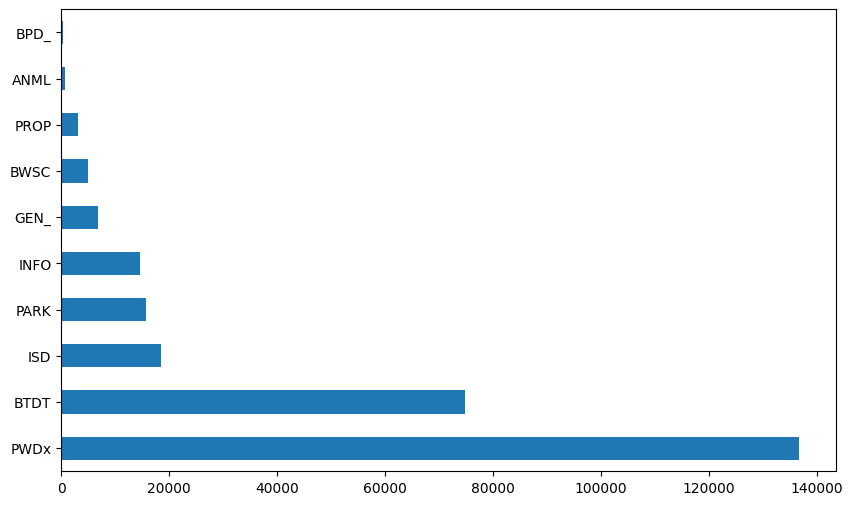

In [12]:
#Plot the top-10 departments with most complaints

df_comp['department'].value_counts().head(10).plot(kind='barh', figsize=(10,6))

<AxesSubplot: >

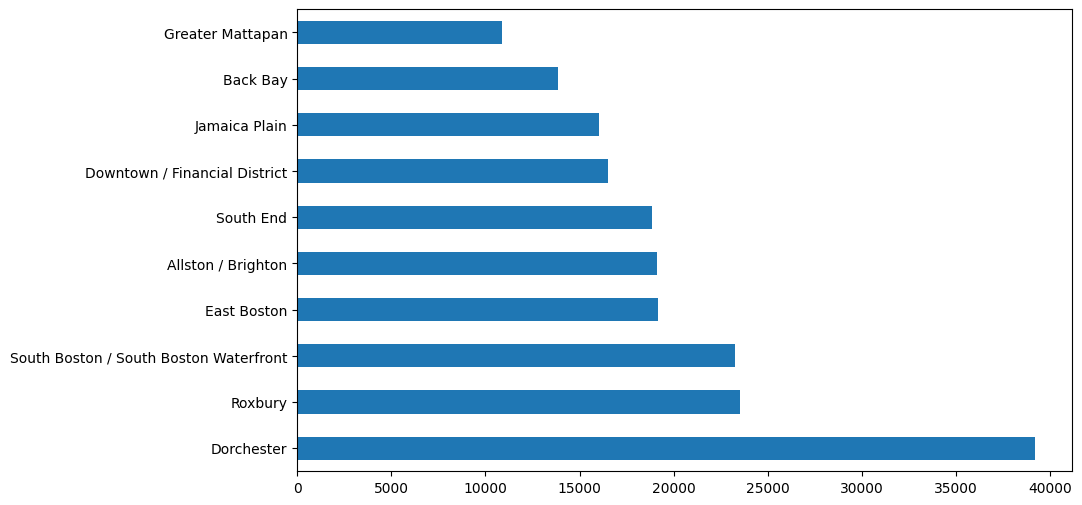

In [13]:
#plot the top-10 neighborhoods with most complaints
df_comp['neighborhood'].value_counts().head(10).plot(kind='barh', figsize=(10,6))

<AxesSubplot: ylabel='neighborhood'>

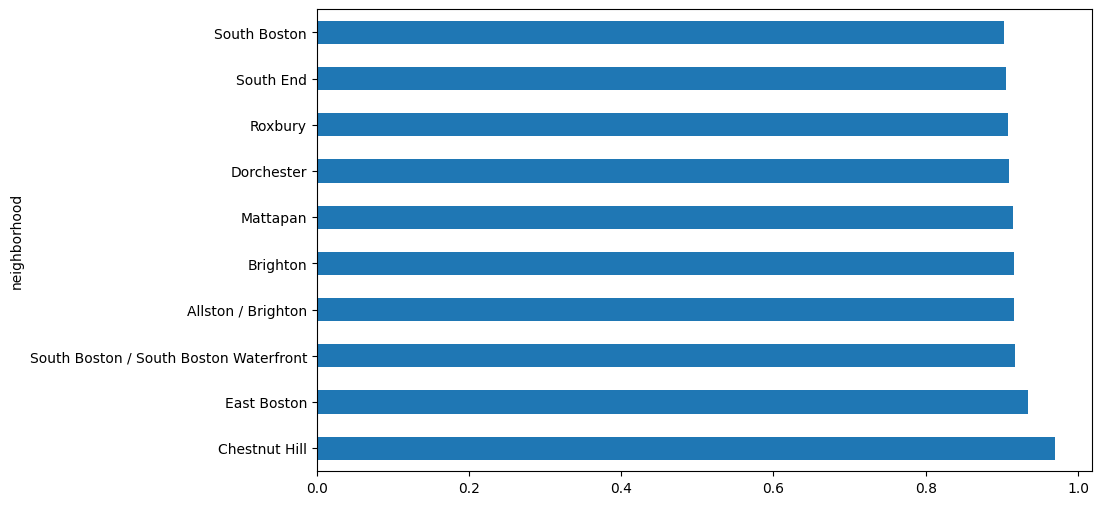

In [14]:
#Area with most closed complaints
df_comp.groupby('neighborhood')['case_status'].value_counts(normalize=True).loc[:,'Closed'].sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10,6))

<AxesSubplot: ylabel='neighborhood'>

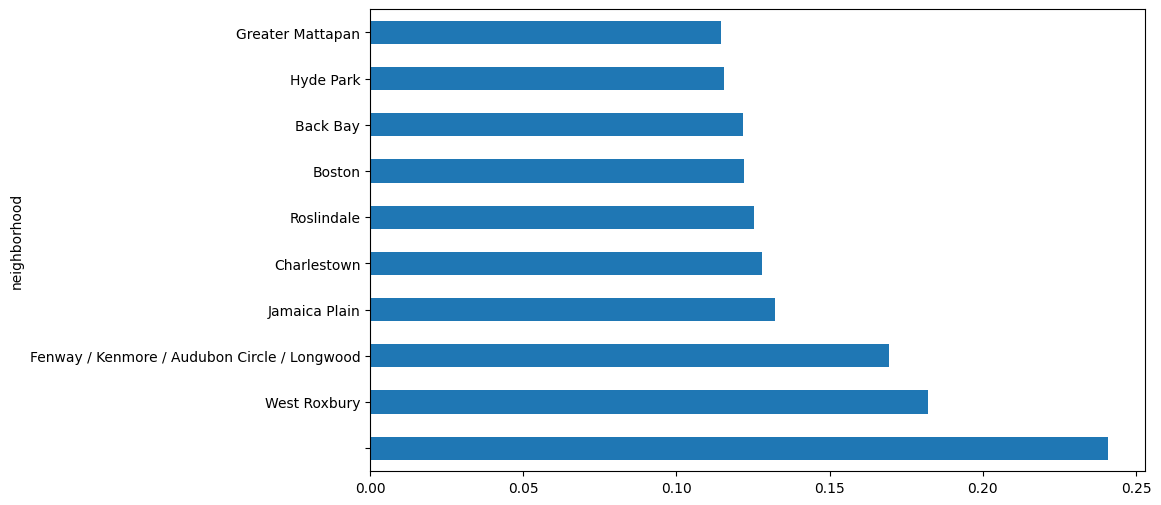

In [15]:
#Area with highest proportion of open complaints
df_comp.groupby('neighborhood')['case_status'].value_counts(normalize=True).loc[:,'Open'].sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10,6))

<AxesSubplot: ylabel='department'>

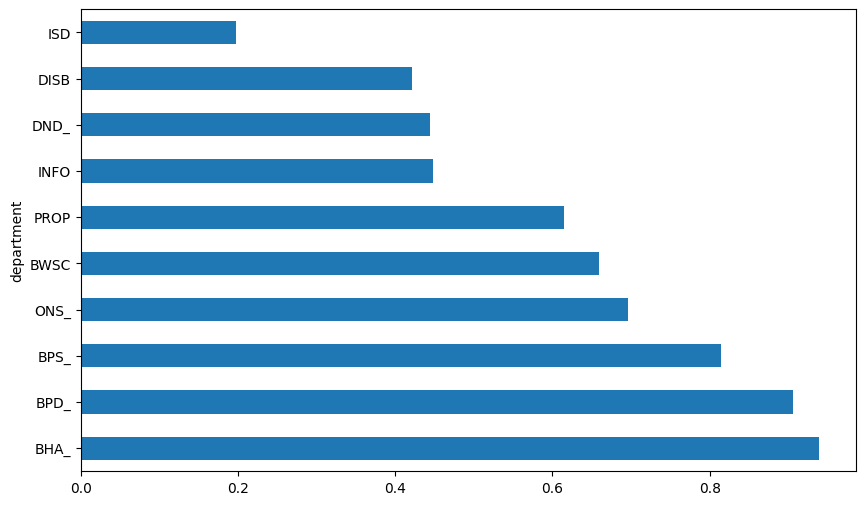

In [16]:
df_comp['ontime']

#Plot the top-10 departments with most ontimely complaints
df_comp.groupby('department')['ontime'].value_counts(normalize=True).loc[:,'OVERDUE'].sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10,6))


<AxesSubplot: ylabel='department'>

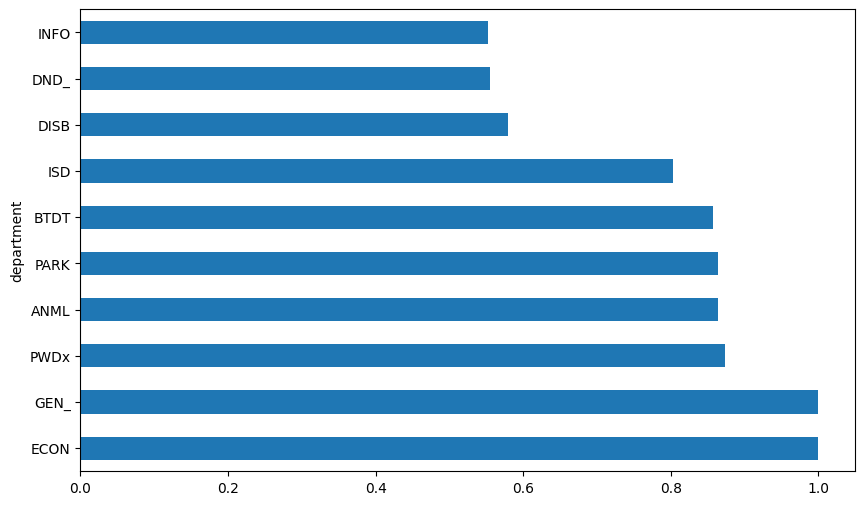

In [17]:
df_comp.groupby('department')['ontime'].value_counts(normalize=True).loc[:,'ONTIME'].sort_values(ascending=False).head(10).plot(kind='barh', figsize=(10,6))


###Proportional analysis

<AxesSubplot: ylabel='neighborhood'>

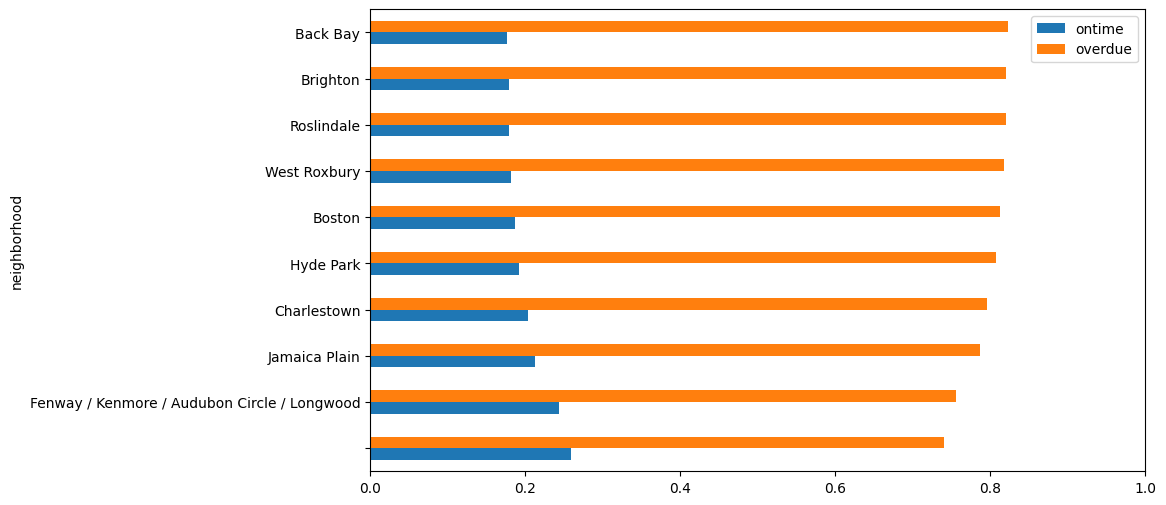

In [31]:
#proportional analysis for for each area
df_prop = df_comp.groupby('neighborhood')['ontime'].value_counts(normalize=True).loc[:,'OVERDUE'].sort_values(ascending=False).head(10).to_frame()
df_prop['overdue_complaints'] = 1-df_prop['ontime']
df_prop.plot(kind='barh', figsize=(10,6), xlim=(0,1))


<AxesSubplot: ylabel='neighborhood'>

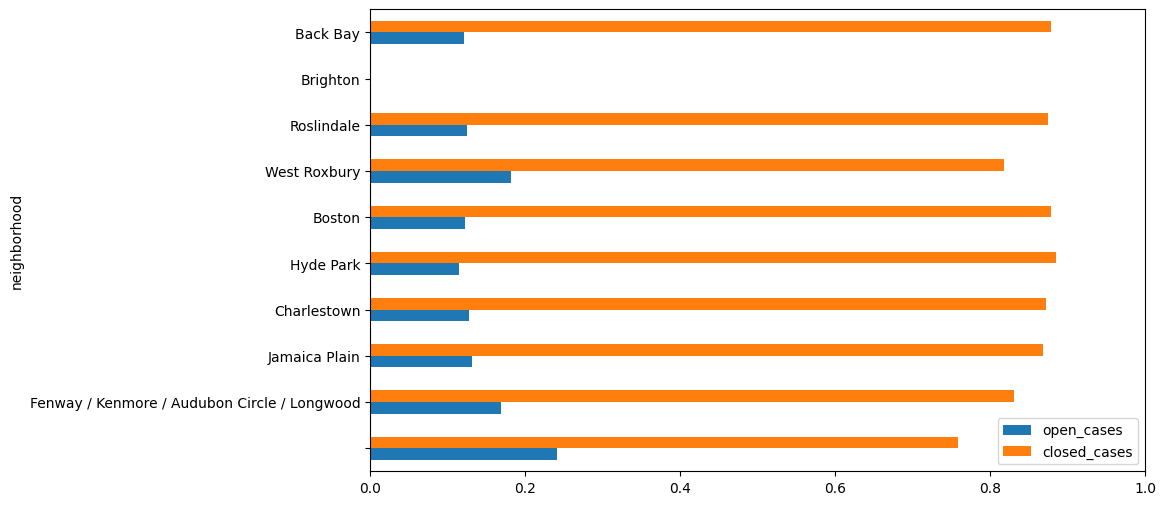

In [39]:
#Do the above analysis for open vs closed complaints

df_prop['open_cases'] = df_comp.groupby('neighborhood')['case_status'].value_counts(normalize=True).loc[:,'Open'].sort_values(ascending=False).head(10).to_frame()
df_prop['closed_cases'] = 1 - df_prop['open_cases']
#plot the open and closes cases columns
df_prop[['open_cases', 'closed_cases']].plot(kind='barh', figsize=(10,6), xlim=(0,1))

In [63]:
#plot the propertions on a map 

#create a base map using folium
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap

#Create a base map
m = folium.Map(location=[42.3601, -71.0589], zoom_start=12)


#find the latitude and longirtude of each neighborhood and add it to the df_prop dataframe
df_comp.dropna(subset=['latitude', 'longitude'], inplace=True)
df_prop['lat'] = df_comp.groupby('neighborhood')['latitude'].mean().sort_values(ascending=False).to_frame()
df_prop['long'] = df_comp.groupby('neighborhood')['longitude'].mean().sort_values(ascending=False).to_frame()

#plot the map, make the size of the marker proportional to the number of open complaints
for i in range(0,len(df_prop)):
    folium.CircleMarker(location=[df_prop.iloc[i]['lat'], df_prop.iloc[i]['long']],
                        radius=df_prop.iloc[i]['open_cases']*100,
                        color='crimson',
                        fill=True,
                        fill_color='crimson'
                       ).add_to(m)
m


In [67]:
#plot the areas with most overdue complaints
for i in range(0,len(df_prop)):
    folium.CircleMarker(location=[df_prop.iloc[i]['lat'], df_prop.iloc[i]['long']],
                        radius=df_prop.iloc[i]['overdue']*50,
                        color='yellow',
                        fill=True,
                        fill_color='yellow'
                       ).add_to(m)
    
m